# learning from data

Using the weight obtained as features

CNN features, the weight in the last layers.

In [1]:
%%time

import numpy as np
import matplotlib.pyplot as plt
from root_pandas import read_root
from sklearn.preprocessing import normalize

plt.rcParams['figure.figsize'] = 10.0, 8.0

file_piled = "Piled_2.root"
file_flat = "Flat.root"
file_alpha = "Alpha_11.root"
file_ls = "LS.root"
file_ls_beta = "LS_BETA.root"
file_ref = "RefPulse009.root"

file_pre_analysis = "Run009-230-001.root"

data = "PMTALL"
tree = "tree"

pmt_all_length = 4480

def NORM(file, tree, data):
    pmtall = read_root(file, tree, columns=[data],flatten=[data])
    num_entries, w = pmtall.shape
    num_entries = int(num_entries/pmt_all_length)
    x = pmtall.PMTALL.values.reshape(num_entries, pmt_all_length)
    x_abs = abs(x - 15200)
    extra = np.arange(4096, pmt_all_length)
    x_mod = np.delete(x_abs, extra, axis=1)
    x_nor = normalize(x_mod, norm="l1")
    return x_nor

# PMTALL_piled = NORM(file_piled, tree, data)
# PMTALL_flat = NORM(file_flat, tree, data)
# PMTALL_alpha = NORM(file_alpha, tree, data)
# PMTALL_ls = NORM(file_ls, tree, data)
# PMTALL_ls_beta = NORM(file_ls_beta, tree, data)
# PMTALL_ref = NORM(file_ref, tree, data)

def sep(x, ratio, group):
    train = np.zeros((int(len(x)*ratio), len(x[0])))
    test = np.zeros((int(len(x)*(1-ratio)), len(x[0])))
    for i in range(len(x)):
        if i < int(len(x)*ratio):
            train[i] = x[i]
        if i >= int(len(x)*ratio):
            k = i - int(len(x)*ratio) - 1
            test[k] = x[i]
    train_label = np.zeros(len(train))
    test_label = np.zeros(len(test))
    for i in range(len(train)):
        train_label[i] = group
    for i in range(len(test)):
        test_label[i] = group
    return train, test, train_label, test_label

# ratio = 0.8
# piled = sep(PMTALL_piled, ratio, 0)
# flat = sep(PMTALL_flat, ratio, 1)
# alpha = sep(PMTALL_alpha, ratio, 2)
# ls = sep(PMTALL_ls, ratio, 3)
# ls_beta = sep(PMTALL_ls_beta, ratio, 4)
# ref = sep(PMTALL_ref, ratio, 5)

# del PMTALL_piled, PMTALL_flat, PMTALL_alpha, PMTALL_ls, PMTALL_ls_beta, PMTALL_ref

import keras
def data_for_cnn(x1, x2, x3, x4, x5, x6,z):
    x11, x12, x13, x14 = x1
    x21, x22, x23, x24 = x2
    x31, x32, x33, x34 = x3
    x41, x42, x43, x44 = x4
    x51, x52, x53, x54 = x5
    x61, x62, x63, x64 = x6
    y1 = np.concatenate((x11, x21, x31, x41, x51, x61), axis=0)
    y2 = np.concatenate((x12, x22, x32, x42, x52, x62), axis=0)
    y3 = np.concatenate((x13, x23, x33, x43, x53, x63), axis=0)
    y4 = np.concatenate((x14, x24, x34, x44, x54, x64), axis=0)
    iy1 = np.expand_dims(y1, axis=2)
    iy2 = np.expand_dims(y2, axis=2)
    iy3 = keras.utils.to_categorical(y3, z)
    iy4 = keras.utils.to_categorical(y4, z)
    return iy1, iy2, iy3, iy4

# classes = 6
# train_data, test_data, train_label, test_label = data_for_cnn(piled, flat, alpha, ls, ls_beta, ref,classes)

# del piled, flat, alpha, ls, ls_beta, ref
# print("done!")


Welcome to JupyROOT 6.10/02


Using TensorFlow backend.


CPU times: user 3.94 s, sys: 1.16 s, total: 5.1 s
Wall time: 7.29 s


(3968,)
(32, 6) (6,)
(32, 6)


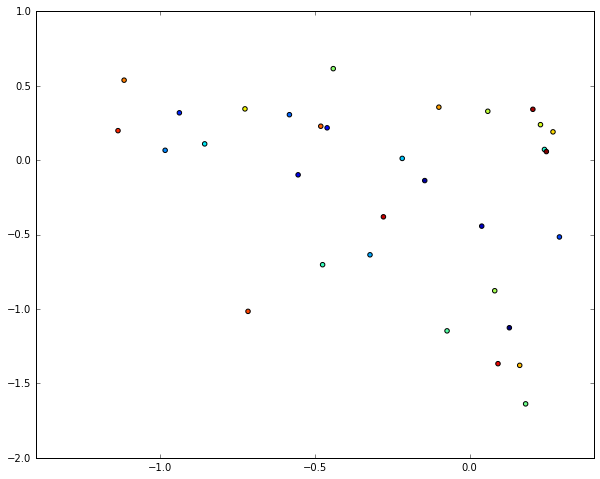

2017-11-29 13:41:45.410145: I tensorflow/core/platform/cpu_feature_guard.cc:137] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX


In [2]:
from keras.models import load_model
model = load_model("for_root_implementation.h5")

# PMTALL_pre_analysis = NORM(file_pre_analysis, tree, data)
# PMTALL_pre_analysis = np.expand_dims(PMTALL_pre_analysis,axis=2)

# features = model.predict(PMTALL_pre_analysis,batch_size=50,verbose=1)

conv_pull = model.layers[7].get_weights()
print(conv_pull[0][0:,1].shape)

weights = model.layers[10].get_weights()
print(weights[0].shape,weights[1].shape)
print(weights[0][:,:10].shape)

# plt.ion()

# for i in range(64):
#     plt.plot(weights[0][:,i])
#     plt.pause(0.1)

from mpl_toolkits.mplot3d import Axes3D

c = np.arange(32)
fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(weights[0][:,0],weights[0][:,1],weights[0][:,2],c=c)
# ax.scatter(weights[0][:,0],weights[0][:,1],weights[0][:,3],c=c)
# ax.scatter(weights[0][:,0],weights[0][:,1],weights[0][:,4],c=c)
# ax.scatter(weights[0][:,0],weights[0][:,1],weights[0][:,5],c=c)
plt.scatter(weights[0][:,0],weights[0][:,4],c=c)
# plt.scatter(weights[0][:,0],weights[0][:,2])
# plt.scatter(weights[0][:,0],weights[0][:,3])
# plt.scatter(weights[0][:,0],weights[0][:,4])
# plt.scatter(weights[0][:,0],weights[0][:,5])
plt.show()

plt.figure()
plt.scatter(conv_pull[0][:,0],conv_pull[0][:,1])